## Assignment 2
by: Mohamed Hatem El-Badry     900211356

In [93]:
!pip install pandas
import pandas as pd
!pip install numpy
import numpy as np

You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


## **Part I:**

### *Statistical analysis of results of international football matches starting from 1872 up to 2022*

The dataset in results.csv includes 43,170 results of international football matches starting from
the very first official match in 1872 up to 2019. The matches range from FIFA World Cup to FIFI
Wild Cup to regular friendly matches. The matches are strictly men’s full internationals and the
data does not include Olympic Games or matches where at least one of the teams was the nation’s
B-team, U-23 or a league select team.

#### in this part, i will analyze the following: the probability of 3 different European countries' winning chance in comparison to Egypt's, in friendly tournament in home land

In [94]:
df= pd.read_csv('results.csv' , encoding='latin-1')
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43183,2/1/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False
43184,2/2/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,YaoundÃ©,Cameroon,True
43185,2/3/2022,Cameroon,Egypt,0,0,African Cup of Nations,YaoundÃ©,Cameroon,False
43186,2/5/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,YaoundÃ©,Cameroon,False


In [95]:
x=df['home_score']-df['away_score']

In [96]:
conditions=[(x<0),(x>0), (x==0)]

In [97]:
values=['lose','win','draw']

In [98]:
df['result_home']=np.select(conditions,values)

In [99]:
df['result_home'].value_counts(normalize=True)

In [100]:
x=df['result_home'].value_counts()
x=np.array(x)

In [101]:
x.sum()

43188

In [102]:
df_noneutral=df[df['neutral']==False]

In [103]:
df_noneutral.shape

(32481, 10)

In [104]:
x=df_noneutral['result_home'].value_counts(normalize=True)
x

In [105]:
df_noneutralegy=df_noneutral[df_noneutral['country']=='Egypt'] #probability that egypt wins in it land

In [106]:
df_noneutralegyF=df_noneutralegy[df_noneutralegy['tournament']=='Friendly']
df_noneutralegyF  #probability of Egypt Winning in their land in friendly tournament

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result_home
1463,2/19/1932,Egypt,Hungary,0,0,Friendly,Cairo,Egypt,False,draw
1895,6/19/1936,Egypt,Greece,3,1,Friendly,Cairo,Egypt,False,win
2927,12/24/1948,Egypt,Norway,1,1,Friendly,Cairo,Egypt,False,draw
3080,2/17/1950,Egypt,Greece,2,0,Friendly,Cairo,Egypt,False,win
3425,1/16/1953,Egypt,Yugoslavia,1,3,Friendly,Cairo,Egypt,False,lose
...,...,...,...,...,...,...,...,...,...,...
40925,6/13/2019,Egypt,Tanzania,1,0,Friendly,Alexandria,Egypt,False,win
40947,6/16/2019,Egypt,Guinea,3,1,Friendly,Alexandria,Egypt,False,win
41450,10/14/2019,Egypt,Botswana,1,0,Friendly,Cairo,Egypt,False,win
41514,11/7/2019,Egypt,Liberia,1,0,Friendly,Alexandria,Egypt,False,win


In [107]:
x=df_noneutralegyF['result_home'].value_counts(normalize=True)
x

In [108]:

import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [109]:
x=df_noneutralegyF['result_home'].value_counts()
x=np.array(x)
x

In [110]:
N=x.sum()

In [111]:
CI_egy=proportion_confint(count=x[0], nobs=N, alpha=(1-.95))
CI_egy

(0.47077769679111225, 0.6326705790709567)

In [112]:
df_noneutralgre=df_noneutral[df_noneutral['country']=='Greece']

In [113]:
df_noneutralgreF=df_noneutralgre[df_noneutralgre['tournament']=='Friendly']

In [114]:
df_noneutralgreF.shape

(126, 10)

In [115]:
df_noneutralgreF['result_home'].value_counts(normalize=True)

In [116]:
x=df_noneutralgreF['result_home'].value_counts()
x=np.array(x)
N=x.sum()
CI_gre=proportion_confint(count=x[0], nobs=N, alpha=(1-.95))
CI_gre

(0.3114005769651982, 0.4822502166855954)

In [117]:
df_noneutralwal=df_noneutral[df_noneutral['country']=='Wales']
df_noneutralwalF=df_noneutralwal[df_noneutralwal['tournament']=='Friendly']
df_noneutralwalF['result_home'].value_counts(normalize=True)

In [118]:
x=df_noneutralwalF['result_home'].value_counts()
x=np.array(x)
N=x.sum()
CI_wal=proportion_confint(count=x[0], nobs=N, alpha=(1-.95))
CI_wal

(0.2541364398001451, 0.478257926397038)

In [119]:
df_noneutralscot=df_noneutral[df_noneutral['country']=='Scotland']
df_noneutralscotF=df_noneutralscot[df_noneutralscot['tournament']=='Friendly']
df_noneutralscotF['result_home'].value_counts(normalize=True)

In [120]:
x=df_noneutralscotF['result_home'].value_counts()
x=np.array(x)
N=x.sum()
CI_scot=proportion_confint(count=x[0], nobs=N, alpha=(1-.95))
CI_scot

(0.4048157345543417, 0.5951842654456583)

In [121]:
import matplotlib.pyplot as plt

In [122]:
ci_friendly = {}
ci_friendly['country'] = ['Egypt','Greece','Wales', 'Scotland']
ci_friendly['lb'] = [CI_egy[0],CI_gre[0],CI_wal[0], CI_scot[0]]
ci_friendly['ub'] = [CI_egy[1],CI_gre[1],CI_wal[1], CI_scot[1]]
df_ci= pd.DataFrame(ci_friendly)
df_ci

,country,lb,ub
0,Egypt,0.470778,0.632671
1,Greece,0.311401,0.482250
2,Wales,0.254136,0.478258
3,Scotland,0.404816,0.595184


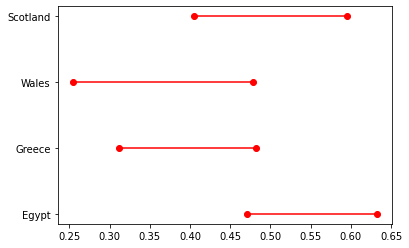

In [123]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):

    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['country'])) #a graph for the confidence interval of 4 different countries' winning chance in friendly tournament in home land

this can make us determine that Egypt has the higher chance of winning a friendly tournament done on their homeland among the 4 countries; as Egypt's team members are more used to play in national matches than internati0nal ones

#### In this part, im going to analyze the following: the probability of losing of the same 3 European countries in comparison with Egypt, in a friendly tournament, playing as the away team. 

In [124]:
x=df['home_score']-df['away_score']
conditions=[(x<0),(x>0), (x==0)]
values=['win','lose','draw']
df['result_away']=np.select(conditions,values)
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result_home,result_away
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win,lose
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,lose
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win,lose
...,...,...,...,...,...,...,...,...,...,...,...
43183,2/1/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False,win,lose
43184,2/2/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,YaoundÃ©,Cameroon,True,lose,win
43185,2/3/2022,Cameroon,Egypt,0,0,African Cup of Nations,YaoundÃ©,Cameroon,False,draw,draw
43186,2/5/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,YaoundÃ©,Cameroon,False,draw,draw


In [125]:
df_noneutral=df[df['neutral']==False]

In [126]:
df_noneutralegy=df_noneutral[df_noneutral['away_team']=='Egypt']
df_noneutralegyF=df_noneutralegy[df_noneutralegy['tournament']=='Friendly']
x=df_noneutralegyF['result_away'].value_counts()
x=np.array(x)
x
N=x.sum()
CI_egy=proportion_confint(count=x[1], nobs=N, alpha=(1-.95))
CI_egy

(0.24715478691048412, 0.43284521308951596)

In [127]:
df_noneutralgre=df_noneutral[df_noneutral['away_team']=='Greece']
df_noneutralgreF=df_noneutralgre[df_noneutralgre['tournament']=='Friendly']
x=df_noneutralgreF['result_away'].value_counts()
x=np.array(x)
x
N=x.sum()
CI_gre=proportion_confint(count=x[1], nobs=N, alpha=(1-.95))
CI_gre

(0.22828832246685596, 0.39779863405488325)

In [128]:
df_noneutralwal=df_noneutral[df_noneutral['away_team']=='Wales']
df_noneutralwalF=df_noneutralwal[df_noneutralwal['tournament']=='Friendly']
x=df_noneutralwalF['result_away'].value_counts()
x=np.array(x)
x
N=x.sum()
CI_wal=proportion_confint(count=x[1], nobs=N, alpha=(1-.95))
CI_wal

(0.18082080408154663, 0.37339606338833287)

In [129]:
df_noneutralscot=df_noneutral[df_noneutral['away_team']=='Scotland']
df_noneutralscotF=df_noneutralscot[df_noneutralscot['tournament']=='Friendly']
x=df_noneutralscotF['result_away'].value_counts()
x=np.array(x)
x
N=x.sum()
CI_scot=proportion_confint(count=x[1], nobs=N, alpha=(1-.95))
CI_scot

(0.2936725636434827, 0.466658014868914)

In [130]:
ci_friendlyL = {}
ci_friendlyL['country'] = ['Egypt','Greece','Wales', 'Scotland']
ci_friendlyL['lb'] = [CI_egy[0],CI_gre[0],CI_wal[0], CI_scot[0]]
ci_friendlyL['ub'] = [CI_egy[1],CI_gre[1],CI_wal[1], CI_scot[1]]
df_ci= pd.DataFrame(ci_friendlyL)
df_ci

,country,lb,ub
0,Egypt,0.247155,0.432845
1,Greece,0.228288,0.397799
2,Wales,0.180821,0.373396
3,Scotland,0.293673,0.466658


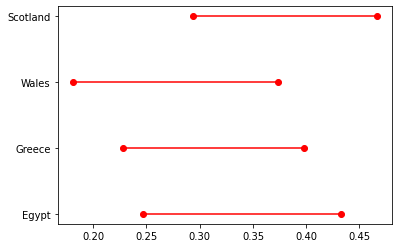

In [131]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):

    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['country']))

This shows that scotland has the higher probability of losing in a friendly tournament away from their home. this is due to the fact that scotland doesnt have a strong soccer team. it can be shown in how they have never progressed beyond the first group stage of a finals tournament.

#### In this part, im going to analyze the following: the probability that Egypt wins in 3 different tournaments (Friendly, FIFA world cup, and African cup of nations) as the away team

In [132]:
y=list(df['tournament'].value_counts().index)
y

['Friendly',
 'FIFA World Cup qualification',
 'UEFA Euro qualification',
 'African Cup of Nations qualification',
 'FIFA World Cup',
 'Copa AmÃ©rica',
 'African Cup of Nations',
 'AFC Asian Cup qualification',
 'CECAFA Cup',
 'CFU Caribbean Cup qualification',
 'Merdeka Tournament',
 'British Championship',
 'Gulf Cup',
 'AFC Asian Cup',
 'Gold Cup',
 'Island Games',
 'UEFA Euro',
 'COSAFA Cup',
 'UEFA Nations League',
 'AFF Championship',
 'Nordic Championship',
 'African Nations Championship',
 'CFU Caribbean Cup',
 'AmÃ\xadlcar Cabral Cup',
 "King's Cup",
 'South Pacific Games',
 'UNCAF Cup',
 'Korea Cup',
 'SAFF Cup',
 'Arab Cup',
 'Confederations Cup',
 'International Cup',
 'CCCF Championship',
 'EAFF Championship',
 'CONCACAF Nations League',
 'Windward Islands Tournament',
 'CONIFA World Football Cup',
 'Oceania Nations Cup',
 'AFC Challenge Cup',
 'WAFF Championship',
 'Baltic Cup',
 'AFC Challenge Cup qualification',
 'Nehru Cup',
 'Balkan Cup',
 'Indonesia Tournament',
 'Oc

In [133]:
df_noneutralegy=df_noneutral[df_noneutral['away_team']=='Egypt']
df_noneutralegyF=df_noneutralegy[df_noneutralegy['tournament']=='Friendly']
x=df_noneutralegyF['result_away'].value_counts()
x=np.array(x)
x
N=x.sum()
CI_egyF=proportion_confint(count=x[0], nobs=N, alpha=(1-.95))
CI_egyF

(0.28486600512143223, 0.4751339948785678)

In [134]:
df_noneutralegy=df_noneutral[df_noneutral['away_team']=='Egypt']
df_noneutralegyF=df_noneutralegy[df_noneutralegy['tournament']=='FIFA World Cup qualification']
x=df_noneutralegyF['result_away'].value_counts()
x=np.array(x)
x
N=x.sum()
CI_egyFIFA=proportion_confint(count=x[0], nobs=N, alpha=(1-.95))
CI_egyFIFA

(0.24249192186541954, 0.5302353508618531)

In [135]:
df_noneutralegy=df_noneutral[df_noneutral['away_team']=='Egypt']
df_noneutralegyF=df_noneutralegy[df_noneutralegy['tournament']=='African Cup of Nations qualification']
x=df_noneutralegyF['result_away'].value_counts()
x=np.array(x)
x
N=x.sum()
CI_egyAFRI=proportion_confint(count=x[0], nobs=N, alpha=(1-.95))
CI_egyAFRI

(0.3149304774470007, 0.6324379436056309)

In [136]:
ci_tour = {}
ci_tour['tournament'] = ['Friendly','FIFA World Cup qualification','African Cup of Nations qualification']
ci_tour['lb'] = [CI_egyF[0],CI_egyFIFA[0],CI_egyAFRI[0]]
ci_tour['ub'] = [CI_egyF[1],CI_egyFIFA[1],CI_egyAFRI[1]]
df_ci= pd.DataFrame(ci_tour)
df_ci

,tournament,lb,ub
0,Friendly,0.284866,0.475134
1,FIFA World Cup qualification,0.242492,0.530235
2,African Cup of Nations qualification,0.314930,0.632438


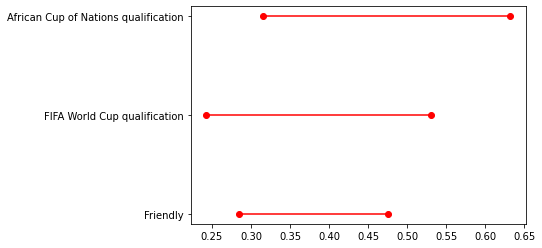

In [137]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):

    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['tournament']))

the graph shows that Egypt has a higher chance in winning in African Cup of Nations qualification as the away team rather than the other two tournaments. this is because Egypt often doesnt qualify for the FIFA world cup, and when it does, it often faces strong opponents which lead to the team losing. also, it would make sense for Egypt to have a higher probability of winning the African Cup of Nations than friendly matches just for the incentive that they would be named the best in the region.

## **Part II:**

### Statistical analysis of Coronavirus Pandemic (COVID 29) over 267 countries

The dataset in covid_data.csv includes the records of two years 2020 and 2021 in the countries
affected by the COVID-19 pandemic.

#### In this part, im going to analyze the following: the probability of cases for each day of the week

In [138]:
df= pd.read_csv('covid_data.csv' , encoding='latin-1')
df

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb
...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec


In [139]:
from pandas.api.types import CategoricalDtype
cats=['Fri', 'Sat' , 'Sun', 'Mon', 'Tue' , 'Wed', 'Thu']
cat_type= CategoricalDtype(categories=cats, ordered=True)
df['weekdays']=df['weekdays'].astype(cat_type)

In [140]:
dfegy=df[df['country']=='Egypt']

In [141]:
stats=dfegy.groupby("weekdays").agg({"dcases": [np.mean, np.std, np.size]})

In [142]:
stats

dcases 
 
 
 
 mean 
 std 
 size 
 
 
 weekdays 
 
 
 
 
 
 
 
 Fri 
 567.161616 
 428.533849 
 99 
 
 
 Sat 
 558.806122 
 421.803605 
 98 
 
 
 Sun 
 545.520408 
 422.358748 
 98 
 
 
 Mon 
 561.846939 
 442.137949 
 98 
 
 
 Tue 
 566.153061 
 419.125460 
 98 
 
 
 Wed 
 561.479592 
 406.337812 
 98 
 
 
 Thu 
 567.683673 
 410.020004 
 98

In [143]:
ci95_h = []
ci95_l = []

In [144]:
import scipy.stats

In [145]:
stats.index

CategoricalIndex(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], categories=['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], ordered=True, dtype='category', name='weekdays')

In [146]:
for i in stats.index:
 m, s, n = stats.loc[i]
 x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
 ci95_h.append(x[1])
 ci95_l.append(x[0])

In [147]:
ci95_h

[653.0661477518557,
 643.8071867945697,
 630.633343760431,
 650.9457415593621,
 650.614430845941,
 643.3640186561778,
 650.3101288341297]

In [148]:
ci95_l

[481.2570845713766,
 473.80505810338957,
 460.4074725660996,
 472.74813599165833,
 481.6916916030385,
 479.5951650172916,
 485.0572181046457]

In [149]:
stats['ci95_hi'] = ci95_h
stats['ci95_lo'] = ci95_l
print(stats)

              dcases                      ci95_hi     ci95_lo
                mean         std size                        
weekdays                                                     
Fri       567.161616  428.533849   99  653.066148  481.257085
Sat       558.806122  421.803605   98  643.807187  473.805058
Sun       545.520408  422.358748   98  630.633344  460.407473
Mon       561.846939  442.137949   98  650.945742  472.748136
Tue       566.153061  419.125460   98  650.614431  481.691692
Wed       561.479592  406.337812   98  643.364019  479.595165
Thu       567.683673  410.020004   98  650.310129  485.057218


In [150]:
df_ci= pd.DataFrame(stats)
df_ci['weekdays']=df_ci.index

In [151]:
df_ci

dcases 
 ci95_hi 
 ci95_lo 
 weekdays 
 
 
 
 mean 
 std 
 size 
 
 
 
 
 
 weekdays 
 
 
 
 
 
 
 
 
 
 
 Fri 
 567.161616 
 428.533849 
 99 
 653.066148 
 481.257085 
 Fri 
 
 
 Sat 
 558.806122 
 421.803605 
 98 
 643.807187 
 473.805058 
 Sat 
 
 
 Sun 
 545.520408 
 422.358748 
 98 
 630.633344 
 460.407473 
 Sun 
 
 
 Mon 
 561.846939 
 442.137949 
 98 
 650.945742 
 472.748136 
 Mon 
 
 
 Tue 
 566.153061 
 419.125460 
 98 
 650.614431 
 481.691692 
 Tue 
 
 
 Wed 
 561.479592 
 406.337812 
 98 
 643.364019 
 479.595165 
 Wed 
 
 
 Thu 
 567.683673 
 410.020004 
 98 
 650.310129 
 485.057218 
 Thu

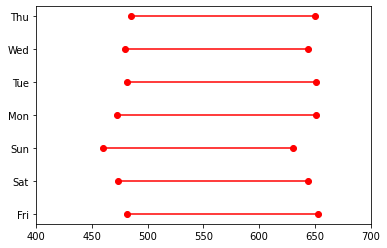

In [152]:
for lb,ub,y in zip(df_ci['ci95_lo'],df_ci['ci95_hi'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['weekdays']))
plt.xlim([400, 700])

This shows that all the days in the week have nearly the same probability of cases, with Sunday having the least probability. that's because in all countries Saturday is a day off so it is logical that people would isolate that day and that would decrease the number of cases reported on Sunday

#### in this part, im going to make a new dataframe with the fatality rate (deaths/cases) for each row, a dataframe for 2020, and a dataframe for 2021

In [153]:
fatality= df['ddeaths']/df['dcases']
df['fatality'] = fatality
df['fatality'] = df['fatality'].fillna(0)
df

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,fatality
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb,0.000000
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb,0.000000
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb,0.000000
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb,0.000000
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec,0.015483
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec,0.015245
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec,0.000000
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec,0.013636


In [154]:
mask = (df['date'] > '2019-12-31') & (df['date'] <= '2020-12-31')
df2020=df.loc[mask]
df2020

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,fatality
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb,0.000000
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb,0.000000
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb,0.000000
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb,0.000000
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
122473,2020-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,114,8,14645468,Sun,Dec,0.070175
122474,2020-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,71,5,14645468,Mon,Dec,0.070423
122475,2020-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,177,5,14645468,Tue,Dec,0.028249
122476,2020-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,300,1,14645468,Wed,Dec,0.003333


In [155]:
mask = (df['date'] > '2020-12-31') & (df['date'] <= '2021-12-31')
df2021=df.loc[mask]
df2021

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,fatality
312,2021-01-01,AFG,Afghanistan,Low income,South Asia,Asia,183,12,38041754,Fri,Jan,0.065574
313,2021-01-02,AFG,Afghanistan,Low income,South Asia,Asia,73,10,38041754,Sat,Jan,0.136986
314,2021-01-03,AFG,Afghanistan,Low income,South Asia,Asia,123,10,38041754,Sun,Jan,0.081301
315,2021-01-04,AFG,Afghanistan,Low income,South Asia,Asia,200,9,38041754,Mon,Jan,0.045000
316,2021-01-05,AFG,Afghanistan,Low income,South Asia,Asia,102,7,38041754,Tue,Jan,0.068627
...,...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec,0.015483
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec,0.015245
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec,0.000000
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec,0.013636


#### In this part, im going to analyze the following:the probanbility of deaths in 2020 in the 7 different regions

In [156]:
df2020['dcases'].sum()

83839670

In [157]:
df2020['ddeaths'].sum()

1883714

In [158]:
df['region'].unique()

In [159]:
from pandas.api.types import CategoricalDtype
cats=['South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia','Middle East & North Africa','Latin America & Caribbean','East Asia & Pacific','North America']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['region'] = df['region'].astype(cat_type)

In [160]:
stats=df2020.groupby("region").agg({"ddeaths": [np.mean, np.std, np.size]})

In [161]:
stats

ddeaths 
 
 
 
 mean 
 std 
 size 
 
 
 region 
 
 
 
 
 
 
 
 East Asia & Pacific 
 7.110776 
 27.950752 
 6301 
 
 
 Europe & Central Asia 
 36.913612 
 111.023170 
 15743 
 
 
 Latin America & Caribbean 
 57.772410 
 181.529167 
 9750 
 
 
 Middle East & North Africa 
 17.696025 
 47.867778 
 6415 
 
 
 North America(region) 
 534.744557 
 759.732535 
 689 
 
 
 South Asia 
 67.306966 
 204.340594 
 2541 
 
 
 Sub-Saharan Africa 
 3.070567 
 20.413941 
 13519

In [162]:
ci95_hi = []
ci95_lo = []

In [163]:
for i in stats.index:
    m, s, n = stats.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi.append(x[1])
    ci95_lo.append(x[0])

In [164]:
stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

                               ddeaths                        ci95_hi  \
                                  mean         std   size               
region                                                                  
East Asia & Pacific           7.110776   27.950752   6301    7.801103   
Europe & Central Asia        36.913612  111.023170  15743   38.648076   
Latin America & Caribbean    57.772410  181.529167   9750   61.376274   
Middle East & North Africa   17.696025   47.867778   6415   18.867704   
North America(region)       534.744557  759.732535    689  591.614040   
South Asia                   67.306966  204.340594   2541   75.257437   
Sub-Saharan Africa            3.070567   20.413941  13519    3.414725   

                               ci95_lo  
                                        
region                                  
East Asia & Pacific           6.420449  
Europe & Central Asia        35.179149  
Latin America & Caribbean    54.168546  
Middle East & North Afr

In [165]:
df_ci= pd.DataFrame(stats)
df_ci['region']=df_ci.index

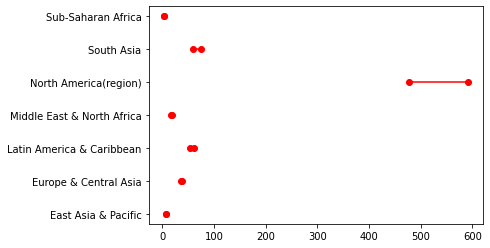

In [166]:
for lb,ub,y in zip(df_ci['ci95_lo'],df_ci['ci95_hi'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['region']))

this shows that north America had the highest probability of number of deaths among the regions in 2020. this is probably because of the elections period in north america that occurred in 2020

#### In this part, im going to analyze the following: the probability of cases in 2021 regarding the income level

In [167]:
df['income'].unique()

In [168]:
from pandas.api.types import CategoricalDtype
cats=['Low income', 'Lower middle income', 'Upper middle income','High income']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['income'] = df['income'].astype(cat_type)

In [169]:
stats=df2021.groupby("income").agg({"dcases": [np.mean, np.std, np.size]})
stats
ci95_hi = []
ci95_lo = []

In [170]:
ci95_hi = []
ci95_lo = []
for i in stats.index:
    m, s, n = stats.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi.append(x[1])
    ci95_lo.append(x[0])
stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

                          dcases                           ci95_hi  \
                            mean           std   size                
income                                                               
High income          4520.954339  18317.784729  20937  4769.095778   
Low income            168.681058    657.105911  10585   181.201170   
Lower middle income  2550.449589  17762.604302  16653  2820.256518   
Upper middle income  3368.106393   8585.182602  19710  3487.971286   

                         ci95_lo  
                                  
income                            
High income          4272.812901  
Low income            156.160946  
Lower middle income  2280.642659  
Upper middle income  3248.241499  


In [171]:
df_ci= pd.DataFrame(stats)
df_ci['income']=df_ci.index

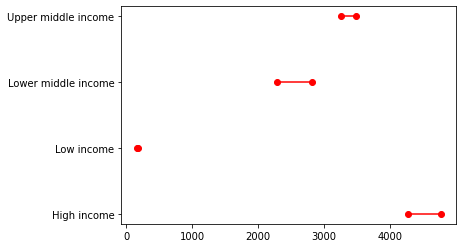

In [172]:
for lb,ub,y in zip(df_ci['ci95_lo'],df_ci['ci95_hi'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['income']))

it shows that the higher the income, the higher the probability of cases in 2021. this can be interpreted as the higher the income, the more often the person travels, and travelling at that time was dangerous because you could get Covid.

#### In this part, im going to analyze the following: the probability of deaths in different continents

In [173]:
df['continent'].unique()

In [174]:
from pandas.api.types import CategoricalDtype
cats=['Asia', 'Africa', 'Europe','South America(continent)', 'North America(continent)', 'Oceania']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['continent'] = df['continent'].astype(cat_type)

In [175]:
stats=df.groupby("continent").agg({"ddeaths": [np.mean, np.std, np.size]})
stats

ddeaths 
 
 
 
 mean 
 std 
 size 
 
 
 continent 
 
 
 
 
 
 
 
 Asia 
 40.516863 
 192.130158 
 31103 
 
 
 Africa 
 6.588286 
 31.043424 
 34677 
 
 
 Europe 
 52.627530 
 140.575791 
 29103 
 
 
 South America(continent) 
 149.393112 
 374.768755 
 7985 
 
 
 North America(continent) 
 80.393197 
 340.582323 
 15229 
 
 
 Oceania 
 0.758323 
 3.094773 
 4746

In [176]:
ci95_hi = []
ci95_lo = []
for i in stats.index:
    m, s, n = stats.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hi.append(x[1])
    ci95_lo.append(x[0])
stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

                             ddeaths                        ci95_hi  \
                                mean         std   size               
continent                                                             
Asia                       40.516863  192.130158  31103   42.652200   
Africa                      6.588286   31.043424  34677    6.915038   
Europe                     52.627530  140.575791  29103   54.242689   
South America(continent)  149.393112  374.768755   7985  157.614915   
North America(continent)   80.393197  340.582323  15229   85.803023   
Oceania                     0.758323    3.094773   4746    0.846401   

                             ci95_lo  
                                      
continent                             
Asia                       38.381527  
Africa                      6.261534  
Europe                     51.012371  
South America(continent)  141.171309  
North America(continent)   74.983371  
Oceania                     0.670244  


In [177]:
df_ci= pd.DataFrame(stats)
df_ci['continent']=df_ci.index

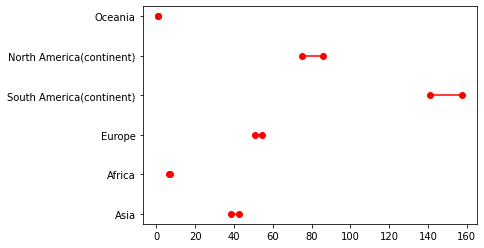

In [178]:
for lb,ub,y in zip(df_ci['ci95_lo'],df_ci['ci95_hi'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['continent']))

Europe had the highest probability of deaths, this can be because of the high number of old-aged people in Europe which affects the mortality rate of Covid 19

In [180]:
df['totcases'] = df.groupby(['iso3c'])['dcases'].cumsum()

In [181]:
df.loc[df['iso3c']=='EGY'].head(6)

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,fatality,totcases
34049,2020-02-14,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,1,0,100388073,Fri,Feb,0.0,1
34050,2020-02-15,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,0,0,100388073,Sat,Feb,0.0,1
34051,2020-02-16,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,0,0,100388073,Sun,Feb,0.0,1
34052,2020-02-17,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,0,0,100388073,Mon,Feb,0.0,1
34053,2020-02-18,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,0,0,100388073,Tue,Feb,0.0,1
34054,2020-02-19,EGY,Egypt,Lower middle income,Middle East & North Africa,Africa,0,0,100388073,Wed,Feb,0.0,1


In [182]:
df['totdeaths'] = df.groupby(['iso3c'])['ddeaths'].cumsum()

In [183]:
df['totdeaths'].loc[df['iso3c']=='EGY']

In [184]:
df['cfr']=df['totdeaths']/df['totcases']

In [191]:
df_egy=df.loc[df['iso3c']=='EGY']

In [194]:
df_egy['date'] = pd.to_datetime(df_egy['date'],format='%Y-%m-%d')

<ipython-input-194-175de7e90af9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_egy['date'] = pd.to_datetime(df_egy['date'],format='%Y-%m-%d')


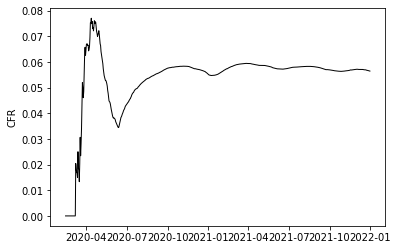

In [205]:
plt.plot( 'date', 'cfr', data=df_egy,  color='black', markersize=4,     linewidth=1)
plt.xlabel("")
plt.ylabel("CFR")
plt.show()

This shows that Egypt saw a spike in the fatality rate between 04/2020 and 07/2020. this can be explained by the fact that at that time it was ramadan, where people usually gather in the after noon to have breakfast together. This would cause the number of cases to increase which is due to the interaction between people, which would lead to an in crease in the fatality rate.

In 2021, the fatality rate started stabilizing in Egypt. This is due to the appliance of the vaccine procedures and the social distancing and mask rules that were implemented